In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
def distp(X, C):
    return [[np.sum(np.sqrt((xi - ci) * (xi - ci).T), axis=0) for ci in C] for xi in X]

def distp_pairwise(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def distm(X, C):
    V = np.cov(X.T)
    return [[np.sqrt(np.dot((xi - ci).T, np.dot(np.linalg.inv(V), (xi - ci)))) for ci in C] for xi in X]

def kmeans(X, k, mode='e'):
    min_x, min_y = np.min(X, axis=0)
    max_x, max_y = np.max(X, axis=0)
    C_current = np.array([[np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y)] for _ in range(k)])
    C_old = np.zeros_like(C_current)
    for _ in range(100):
        match mode:
            case 'e': 
                distances = distp(X, C_current)
            case 'm':
                distances = distm(X, C_current)
            case _:
                distances = distp(X, C_current)
        CX = np.argmin(distances, axis=1)
        C_old = C_current.copy()
        # C_current = np.array([X[CX == i].mean(axis=0) for i in range(k)])
        for i in range(k):
            if np.any(CX == i):
                C_current[i] = X[CX == i].mean(axis=0)
            else:
                C_current[i] = np.random.uniform([min_x, min_y], [max_x, max_y])
        if np.allclose(C_current, C_old, atol=1e-5):
            break
    return C_current, CX

def kmeans2(X, k, mode='e'):
    # step 1
    min_values = np.min(X, axis=0)
    max_values = np.max(X, axis=0)
    C_current = np.array([np.random.uniform(min_values, max_values) for _ in range(k)])
    C_old = np.zeros_like(C_current)
    P = np.zeros((len(X), k))
    for iteration in range(100):
        match mode:
            case 'e': 
                distances = distp(X, C_current)
            case 'm':
                distances = distm(X, C_current)
            case _:
                distances = distp(X, C_current)
        # step 2
        for i in range(len(X)):
            # min_distance = np.min(distances[i])
            # candidates = np.where(distances[i] == min_distance)[0]
            is_closest = np.ones(k, dtype=bool)  
            for k_ind in range(k):
                for l in range(k):
                    if l != k_ind:
                        if distances[i][k_ind] >= distances[i][l]:
                            is_closest[k_ind] = False
                            break
            candidates = [index for index, val in enumerate(is_closest) if val]
            print(candidates)
            chosen = np.random.choice(candidates) if len(candidates) > 1 else candidates[0]
            P[i] = 0 
            P[i, chosen] = 1
        if np.allclose(C_current, C_old, atol=1e-5):
            break
        C_old = C_current.copy()
        # step 3
        for k_ind in range(k):
            if P[:, k_ind].any():
                C_current[k_ind] = np.average(X, weights=P[:, k_ind], axis=0)  
            else:
                C_current[k_ind] = np.random.uniform(min_values, max_values)
    CX = np.argmax(P, axis=1)
    return C_current, CX

def F_old(C, X, labels):
    a = sum(distp_pairwise(C[k], C[l]) for k in range(len(C)) for l in range(k))
    b = sum(distp_pairwise(x, C[labels[idx]])**2 for idx, x in enumerate(X))
    return a/b

def F(C, X, labels):
    c_distances = distp(C, C)
    a = sum(c_distances[k][l] for k in range(len(C)) for l in range(k + 1, len(C)))

    x_distances = distp(X, C)
    b = sum(x_distances[i][labels[i]] ** 2 for i in range(len(X)))

    return a/b

In [3]:
t = time.time()
X = np.array([[np.random.uniform(0, 5), np.random.uniform(0, 5)] for _ in range(500)])
C, CX = kmeans(X, 4)
print("it took for 1", time.time() - t)
t = time.time()
X = np.array([[np.random.uniform(0, 5), np.random.uniform(0, 5)] for _ in range(500)])
C, CX = kmeans2(X, 4)
print("it took for 2", time.time() - t)
# plt.scatter(X[:, 0], X[:, 1], c=CX)
# plt.scatter(C[:, 0], C[:, 1], c="red")
plt.show()

it took for 1 0.2557213306427002
[1]
[3]
[1]
[0]
[3]
[3]
[0]
[2]
[3]
[2]
[0]
[3]
[3]
[3]
[3]
[2]
[2]
[1]
[3]
[0]
[2]
[2]
[2]
[3]
[1]
[3]
[2]
[3]
[3]
[0]
[3]
[3]
[3]
[0]
[1]
[1]
[3]
[3]
[2]
[2]
[3]
[0]
[1]
[3]
[0]
[3]
[3]
[3]
[2]
[3]
[0]
[0]
[2]
[2]
[0]
[1]
[0]
[2]
[3]
[3]
[1]
[0]
[3]
[3]
[3]
[3]
[3]
[1]
[0]
[2]
[0]
[2]
[3]
[3]
[0]
[2]
[2]
[0]
[1]
[0]
[2]
[2]
[0]
[2]
[3]
[3]
[3]
[2]
[3]
[3]
[1]
[2]
[3]
[2]
[2]
[2]
[2]
[2]
[3]
[0]
[3]
[3]
[2]
[2]
[3]
[3]
[3]
[3]
[1]
[3]
[0]
[3]
[2]
[2]
[3]
[3]
[3]
[0]
[3]
[2]
[0]
[2]
[1]
[3]
[1]
[0]
[2]
[1]
[3]
[3]
[3]
[3]
[1]
[0]
[1]
[1]
[2]
[1]
[0]
[2]
[0]
[2]
[2]
[3]
[0]
[1]
[3]
[3]
[1]
[2]
[3]
[3]
[1]
[0]
[2]
[0]
[2]
[2]
[0]
[2]
[2]
[1]
[3]
[0]
[2]
[3]
[2]
[3]
[3]
[3]
[3]
[0]
[0]
[3]
[1]
[0]
[0]
[0]
[2]
[3]
[3]
[2]
[3]
[3]
[2]
[1]
[3]
[3]
[1]
[3]
[3]
[3]
[3]
[1]
[2]
[2]
[3]
[2]
[2]
[1]
[1]
[3]
[2]
[2]
[0]
[2]
[3]
[2]
[3]
[3]
[1]
[2]
[1]
[2]
[3]
[0]
[0]
[2]
[0]
[2]
[1]
[1]
[3]
[0]
[0]
[3]
[3]
[3]
[0]
[3]
[2]
[2]
[3]
[2]
[0]
[0]
[0]
[1]
[3]
[3]
[0]
[0]

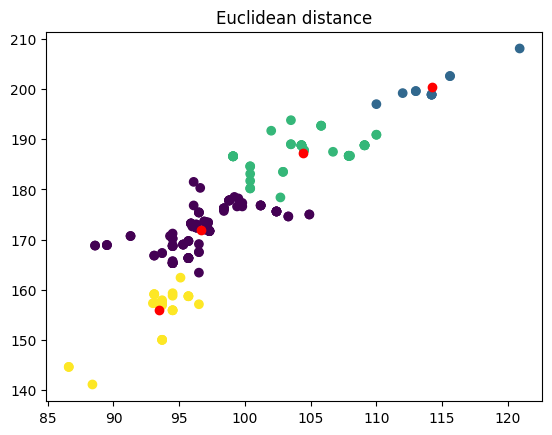

F(C) = 0.026767513230722743
F(C) = 0.03309593352572263


In [187]:
X = pd.read_csv("autos.csv")
X = X[['wheel-base', 'length']].to_numpy()
C, CX = kmeans2(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=CX)
plt.scatter(C[:, 0], C[:, 1], c="red")
plt.title('Euclidean distance')
plt.show()
F_value = F(C, X, CX)
print('F(C) =', F_value)
F_value = F_old(C, X, CX)
print('F(C) =', F_value)

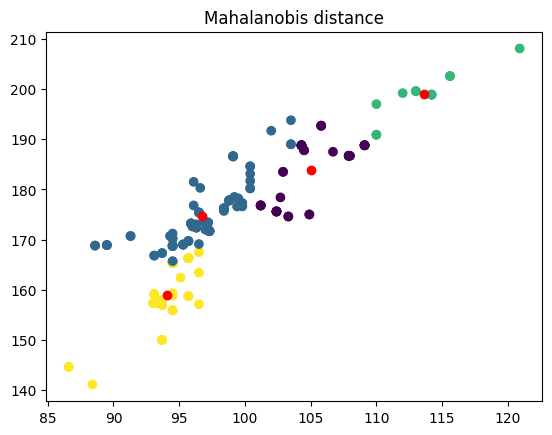

F(C) = 0.014128100209190517
F(C) = 0.016834000483342836


In [186]:
C, CX = kmeans2(X, 4, 'm')
plt.scatter(X[:, 0], X[:, 1], c=CX)
plt.scatter(C[:, 0], C[:, 1], c="red")
plt.title('Mahalanobis distance')
plt.show()
F_value = F(C, X, CX)
print('F(C) =', F_value)
F_value = F_old(C, X, CX)
print('F(C) =', F_value)